# Forecasting
- Time series prediction, or forecasting, can be very similar to modeling and prediction with tabular data.
    - A set of input variables, usually a single output variable.
    - Ordinary machine learning methods can be applied.
- The inclusion of time can be done by adding one or more delayed variables, possibly including the response.
- Specific forecasting methods also exist, e.g., the (S)AR(I)MA(X) family of methods  
  (Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors).
- Neural network models for forecasting include Recurrent Neural Networks, Long-Short Term Memory, Transformers, Retentive Networks, Facebook's [Prophet](https://pypi.org/project/fbprophet/), Amazon's [GluonTS/DeepAR](https://pypi.org/project/gluonts/), etc.
    - Large Language Models, e.g., used in Chat GPT, Bard, etc., rely heavily on forecasting the next word(s) in a sequence.

## Validation
- As soon as _time_ is part of a model, extra care needs to be taken in validation.
- Cross-validation\*, training-validation-test splits are still relevant.
- However, training, validation and test sets needs to follow time chronologically and cannot overlap.
- Instead of traditional cross-validation, one can perform _backtesting_ with a sliding or expanding window:
  
<img src="../images/Backtesting_sliding.png" width="350px">  
<img src="../images/Backtesting_expanding.png" width="350px">  
  
Note that the first samples will never be in the test set.  

Figures from [Roy Yang's bloggpost on uber.com](https://www.uber.com/en-NO/blog/omphalos/)

## Shipping, oil, interst rates and exchange rates
- These data are public data from the Norwegian Bank, SSB, Eurostat and U.S. Energy Information Administration for the period 2000-2014 (monthly).
- The data are available at [ResearchGate](https://www.researchgate.net/publication/275647285_Related_Dataset) and were part of a [Master thesis](https://nmbu.brage.unit.no/nmbu-xmlui/handle/11250/283547) by Raju Rimal.

In [1]:
# Read the FinalData sheet of the OilExchange.xlsx file using Pandas
import pandas as pd
OilExchange = pd.read_excel('../data/OilExchange.xlsx', sheet_name='FinalData') # You may get a warning here, because the file contains pasted grahics
OilExchange.head()

/Users/kristian/miniforge3/envs/IND320/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Date,PerEURO,PerUSD,KeyIntRate,LoanIntRate,EuroIntRate,CPI,OilSpotPrice,ImpOldShip,ImpNewShip,...,ExpExShipOilPlat,TrBal,TrBalExShipOilPlat,TrBalMland,ly.var,l2y.var,l.CPI,ExcChange,Testrain,season
0,2000-01-01,8.1215,8.0129,5.500000,7.500000,3.04,104.1,25.855741,114,915,...,38619,18575,19238,-3257,8.0968,8.1907,103.6,Increase,True,winter
1,2000-02-01,8.0991,8.2361,5.500000,7.500000,3.28,104.6,27.317905,527,359,...,38730,14217,17200,-4529,8.1215,8.0968,104.1,Decrease,True,winter
2,2000-03-01,8.1110,8.4111,5.500000,7.500000,3.51,104.7,26.509183,1385,929,...,42642,13697,18380,-5562,8.0991,8.1215,104.6,Increase,True,Spring
3,2000-04-01,8.1538,8.6081,5.632353,7.632353,3.69,105.1,21.558821,450,2194,...,36860,13142,15499,-5147,8.1110,8.0991,104.7,Increase,True,Spring
4,2000-05-01,8.2015,9.0471,5.750000,7.750000,3.92,105.1,25.147242,239,608,...,42932,17733,18505,-5732,8.1538,8.1110,105.1,Increase,True,Spring


In [2]:
OilExchange.columns

Index(['Date', 'PerEURO', 'PerUSD', 'KeyIntRate', 'LoanIntRate', 'EuroIntRate',
       'CPI', 'OilSpotPrice', 'ImpOldShip', 'ImpNewShip', 'ImpOilPlat',
       'ImpExShipOilPlat', 'ExpCrdOil', 'ExpNatGas', 'ExpCond', 'ExpOldShip',
       'ExpNewShip', 'ExpOilPlat', 'ExpExShipOilPlat', 'TrBal',
       'TrBalExShipOilPlat', 'TrBalMland', 'ly.var', 'l2y.var', 'l.CPI',
       'ExcChange', 'Testrain', 'season'],
      dtype='object')

In [3]:
# Read the FinalCodeBook sheet of the OilExchange.xlsx file using Pandas
Explanations = pd.read_excel('../data/OilExchange.xlsx', sheet_name='FinalCodeBook')
Explanations[['Variables','Label']]

/Users/kristian/miniforge3/envs/IND320/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Variables,Label
0,Date,Date
1,PerEURO,Exchange Rate of NOK per Euro
2,PerUSD,Exchange Rate of NOK per USD
3,KeyIntRate,Key policy rate (Percent)
4,LoanIntRate,Overnight Lending Rate (Nominal)
5,EuroIntRate,Money market interest rates of Euro area (EA11...
6,CPI,Consumer Price Index (1998=100)
7,OilSpotPrice,Europe Brent Spot Price FOB (NOK per Barrel)
8,ImpOldShip,Imports of elderly ships (NOK million)
9,ImpNewShip,Imports of new ships (NOK million)


### Modelling without time
- For starters, let us ignore time and build a simple prediction model for the exchange rate.
- We will use [scikit-learn's Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to combine standardisation (scaling) and linear regression and [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to perform random K-fold cross-validation.

In [4]:
# Import Pipeline, StandardScaler, and LinearRegression from their respective modules in sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a pipeline that scales the data and performs linear regression
pipe = Pipeline([('scaler', StandardScaler()), ('reg', LinearRegression())])

# Fit the pipeline with PerEURO as response and variables 3:-4 as predictors for the samples having True in the Testrain column
OilExchange_train = OilExchange.loc[OilExchange.Testrain==True,:].copy()
OilExchange_test = OilExchange.loc[OilExchange.Testrain==False,:].copy()
pipe.fit(OilExchange_train.loc[:, OilExchange_train.columns[3:-4]], \
         OilExchange_train.loc[:, 'PerEURO'])

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [5]:
# Predict the corresponding data for Testrain = False
PerEURO_pred = pipe.predict(OilExchange_test.loc[:, OilExchange_train.columns[3:-4]])

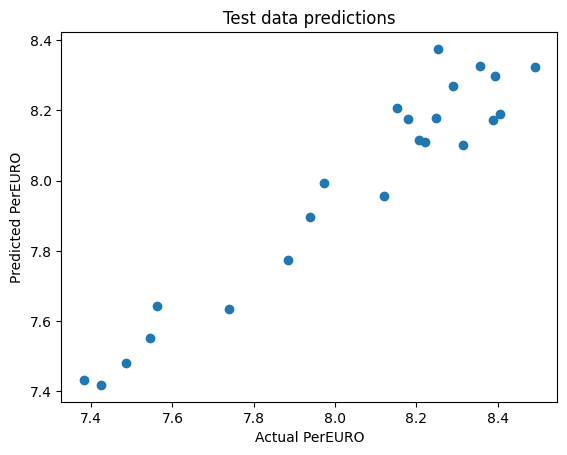

In [6]:
# Plot the predicted values against the actual values
import matplotlib.pyplot as plt
plt.scatter(OilExchange_test.loc[:, 'PerEURO'], PerEURO_pred)
plt.xlabel('Actual PerEURO')
plt.ylabel('Predicted PerEURO')
plt.title('Test data predictions')
plt.show()

In [7]:
# Perform k-fold cross-validation with k=10
from sklearn.model_selection import cross_val_predict # NOTE: Not for time series!
PerEURO_cv = cross_val_predict(pipe, OilExchange_train.loc[:, OilExchange_train.columns[3:-4]], \
                               OilExchange_train.loc[:, 'PerEURO'], cv=10)

# Compute R^2 for PerEURO_cv
from sklearn.metrics import r2_score
r2_cv = r2_score(OilExchange_train.loc[:, 'PerEURO'], PerEURO_cv)
print("Cross-validated R^2: {:.3f}".format(r2_cv))

Cross-validated R^2: 0.856


### Backtesting
- scikit-learn has a [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) which creates segments for backtesting.
    - Expanding window is default.
    - Sliding window can be applied by setting the right combination of parameters.
- We will use [scikit-learn's cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to perform the cross-validation based on the backtesting segments (cross_val_predict assumes that all observations will be test data at some point).


In [8]:
# Backtesting using scikit-learn
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# Some data
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

# Create time series cross-validation object with expanding window
tscv_expand = TimeSeriesSplit()
print(tscv_expand)
for i, (train_index, test_index) in enumerate(tscv_expand.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
Fold 0:
  Train: index=[0]
  Test:  index=[1]
Fold 1:
  Train: index=[0 1]
  Test:  index=[2]
Fold 2:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 3:
  Train: index=[0 1 2 3]
  Test:  index=[4]
Fold 4:
  Train: index=[0 1 2 3 4]
  Test:  index=[5]


In [9]:
# Backtesting with sliding window
tscv_slide = TimeSeriesSplit(max_train_size=3, n_splits=3)
print(tscv_slide)
for i, (train_index, test_index) in enumerate(tscv_slide.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

TimeSeriesSplit(gap=0, max_train_size=3, n_splits=3, test_size=None)
Fold 0:
  Train: index=[0 1 2]
  Test:  index=[3]
Fold 1:
  Train: index=[1 2 3]
  Test:  index=[4]
Fold 2:
  Train: index=[2 3 4]
  Test:  index=[5]


In [10]:
# Backtesting with expanding window in the OilExchange data
tscv_expand = TimeSeriesSplit(n_splits=10)

# The segments
max_train = []
for i, (train_index, test_index) in enumerate(tscv_expand.split(OilExchange_train.loc[:, 'PerEURO'])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    max_train.append(max(train_index))
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  Test:  index=[16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test:  index=[30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
  Test:  index=[44 45 46 47 48 49 50 51 52 53 54 55 56 57]
Fold 3:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
  Test:  index=[58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Fold 4:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 6

In [11]:
# Backtesting using expanding window with data
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe, OilExchange_train.loc[:, OilExchange_train.columns[3:-4]], \
                                 OilExchange_train.loc[:, 'PerEURO'], cv=tscv_expand, \
                                    scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00143194, 0.00120616, 0.00137496, 0.00140905, 0.00109005,
        0.00107718, 0.00108409, 0.00107503, 0.00114608, 0.00106692]),
 'score_time': array([0.00065088, 0.00054312, 0.00058794, 0.00052595, 0.00049806,
        0.00049496, 0.00048494, 0.00049925, 0.000489  , 0.00048995]),
 'test_score': array([-2.69048314e+03, -1.41149796e+00, -1.48578129e+00,  7.23344314e-01,
        -6.50606924e-01, -3.58429116e+11,  7.24779062e-01,  6.71076212e-01,
         3.28546992e-01,  3.81553550e-01]),
 'train_score': array([1.        , 0.99453091, 0.95716141, 0.93872775, 0.93292152,
        0.90824008, 0.87955959, 0.90748863, 0.90501893, 0.90399728])}

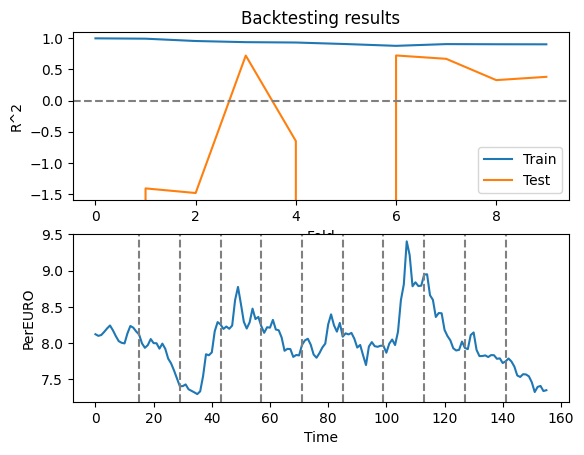

In [12]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

__Question:__ Does the behaviour make sense with regard to what is included in and predict from the model?

In [13]:
# Backtesting with sliding window in the OilExchange data
tscv_slide = TimeSeriesSplit(max_train_size=45, n_splits=10)

# The segments
max_train = []
for i, (train_index, test_index) in enumerate(tscv_slide.split(OilExchange_train.loc[:, 'PerEURO'])):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    max_train.append(max(train_index))
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  Test:  index=[16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Fold 1:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
  Test:  index=[30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Fold 2:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
  Test:  index=[44 45 46 47 48 49 50 51 52 53 54 55 56 57]
Fold 3:
  Train: index=[13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57]
  Test:  index=[58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Fold 4:
  Train: index=[27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
  Test:  index=[72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Fold 5:
  Train: index=[41 42 43 44 

In [14]:
# Backtesting using sliding window with data
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe, OilExchange_train.loc[:, OilExchange_train.columns[3:-4]], \
                                 OilExchange_train.loc[:, 'PerEURO'], cv=tscv_slide, \
                                    scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00154305, 0.00196886, 0.00131679, 0.00117612, 0.00113797,
        0.00114202, 0.00113106, 0.00112176, 0.00111485, 0.00112224]),
 'score_time': array([0.0006268 , 0.00063586, 0.00055122, 0.00054193, 0.00052595,
        0.00052977, 0.00053716, 0.0005312 , 0.00052619, 0.00052977]),
 'test_score': array([-2.69048314e+03, -1.41149796e+00, -1.48578129e+00,  2.15110054e-01,
        -7.83627964e+00, -1.40606556e+12,  5.20015261e-01, -2.78711930e+00,
        -7.94540495e+04,  3.87646039e-01]),
 'train_score': array([1.        , 0.99453091, 0.95716141, 0.94470747, 0.96005874,
        0.90744159, 0.75351647, 0.96129276, 0.93446863, 0.94984339])}

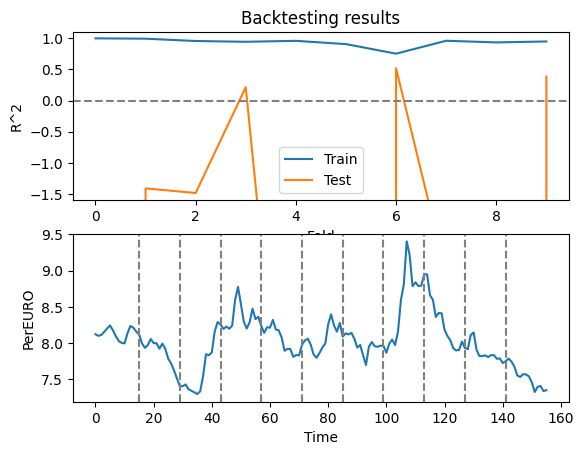

In [15]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

__Question:__ Again; does the behaviour make sense with regard to what is included in and predict from the model?

## Exercise
- Repeat the PerEuro predictions, but exchange LinearRegression with scikit-learns's _PLSRegression_.
- Check if the number of components in the PLS model has an effect on the explained variance ($\text{R}^2$), either manually or using a _GridSearchCV_.

### Including the response variable in the predictors
- As long as the training and test sets are not overlapping, we can include the response as a predictor.
- Adding the response lagged can be done as a single variable or several variables (i.e., several different lags).
- We will later look at ARIMA type models where time lag is the main mechanism for modelling.

In [16]:
# Add the Per Euro column to the OilExchange data but shifted 1 timepoint backwards (and backfill last value)
OilExchange_train['PerEURO_lag1'] = OilExchange_train.PerEURO.shift(1).bfill()
OilExchange_train.head()

,Date,PerEURO,PerUSD,KeyIntRate,LoanIntRate,EuroIntRate,CPI,OilSpotPrice,ImpOldShip,ImpNewShip,...,TrBal,TrBalExShipOilPlat,TrBalMland,ly.var,l2y.var,l.CPI,ExcChange,Testrain,season,PerEURO_lag1
0,2000-01-01,8.1215,8.0129,5.500000,7.500000,3.04,104.1,25.855741,114,915,...,18575,19238,-3257,8.0968,8.1907,103.6,Increase,True,winter,8.1215
1,2000-02-01,8.0991,8.2361,5.500000,7.500000,3.28,104.6,27.317905,527,359,...,14217,17200,-4529,8.1215,8.0968,104.1,Decrease,True,winter,8.1215
2,2000-03-01,8.1110,8.4111,5.500000,7.500000,3.51,104.7,26.509183,1385,929,...,13697,18380,-5562,8.0991,8.1215,104.6,Increase,True,Spring,8.0991
3,2000-04-01,8.1538,8.6081,5.632353,7.632353,3.69,105.1,21.558821,450,2194,...,13142,15499,-5147,8.1110,8.0991,104.7,Increase,True,Spring,8.1110
4,2000-05-01,8.2015,9.0471,5.750000,7.750000,3.92,105.1,25.147242,239,608,...,17733,18505,-5732,8.1538,8.1110,105.1,Increase,True,Spring,8.1538


In [17]:
# Backtesting using sliding window with data
from sklearn.model_selection import cross_validate #       Negative indexing is scary!      -->
scores = cross_validate(pipe, pd.concat([OilExchange_train.loc[:, OilExchange_train.columns[3:-5]], OilExchange_train["PerEURO_lag1"]], axis=1), \
                                 OilExchange_train.loc[:, 'PerEURO'], cv=tscv_slide, \
                                    scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00176787, 0.00150514, 0.00139308, 0.00121284, 0.00152588,
        0.00138998, 0.00124288, 0.00120497, 0.00123715, 0.00117922]),
 'score_time': array([0.00065207, 0.0006578 , 0.00056982, 0.00053406, 0.00062704,
        0.00060701, 0.00055695, 0.00054288, 0.00056195, 0.00055289]),
 'test_score': array([-4.22359364e-01, -1.43018610e+00, -1.33067292e+00,  2.15110060e-01,
        -7.83627964e+00, -1.40606556e+12,  5.20015261e-01, -2.78711930e+00,
        -7.94540719e+04,  3.87646039e-01]),
 'train_score': array([1.        , 0.99518768, 0.95822447, 0.94470747, 0.96005874,
        0.90744159, 0.75351647, 0.96129276, 0.93446863, 0.94984339])}

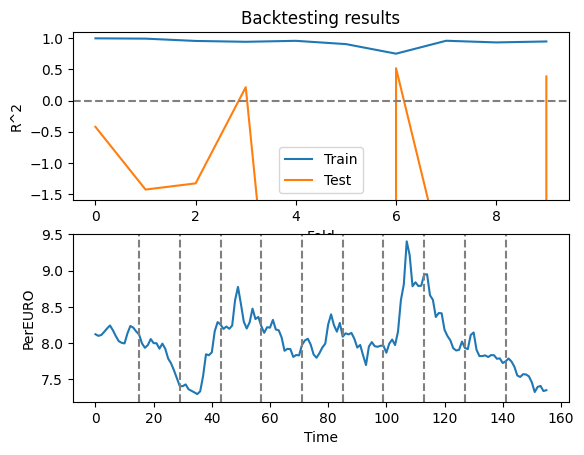

In [18]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

### Five lags

In [19]:
OilExchange_train['PerEURO_lag2'] = OilExchange_train.PerEURO.shift(2).bfill()
OilExchange_train['PerEURO_lag3'] = OilExchange_train.PerEURO.shift(3).bfill()
OilExchange_train['PerEURO_lag4'] = OilExchange_train.PerEURO.shift(4).bfill()
OilExchange_train['PerEURO_lag5'] = OilExchange_train.PerEURO.shift(5).bfill()
OilExchange_train.head()

,Date,PerEURO,PerUSD,KeyIntRate,LoanIntRate,EuroIntRate,CPI,OilSpotPrice,ImpOldShip,ImpNewShip,...,l2y.var,l.CPI,ExcChange,Testrain,season,PerEURO_lag1,PerEURO_lag2,PerEURO_lag3,PerEURO_lag4,PerEURO_lag5
0,2000-01-01,8.1215,8.0129,5.500000,7.500000,3.04,104.1,25.855741,114,915,...,8.1907,103.6,Increase,True,winter,8.1215,8.1215,8.1215,8.1215,8.1215
1,2000-02-01,8.0991,8.2361,5.500000,7.500000,3.28,104.6,27.317905,527,359,...,8.0968,104.1,Decrease,True,winter,8.1215,8.1215,8.1215,8.1215,8.1215
2,2000-03-01,8.1110,8.4111,5.500000,7.500000,3.51,104.7,26.509183,1385,929,...,8.1215,104.6,Increase,True,Spring,8.0991,8.1215,8.1215,8.1215,8.1215
3,2000-04-01,8.1538,8.6081,5.632353,7.632353,3.69,105.1,21.558821,450,2194,...,8.0991,104.7,Increase,True,Spring,8.1110,8.0991,8.1215,8.1215,8.1215
4,2000-05-01,8.2015,9.0471,5.750000,7.750000,3.92,105.1,25.147242,239,608,...,8.1110,105.1,Increase,True,Spring,8.1538,8.1110,8.0991,8.1215,8.1215


In [20]:
# Backtesting using sliding window with data
from sklearn.model_selection import cross_validate #       Negative indexing is scary!      -->
scores = cross_validate(pipe, pd.concat([OilExchange_train.loc[:, OilExchange_train.columns[3:-9]], 
                                         OilExchange_train[["PerEURO_lag1","PerEURO_lag2","PerEURO_lag3","PerEURO_lag4","PerEURO_lag5"]]], axis=1),
                                         OilExchange_train.loc[:, 'PerEURO'], cv=tscv_slide,
                                         scoring='r2', return_train_score=True)
scores

{'fit_time': array([0.00155497, 0.00193214, 0.00132298, 0.00118494, 0.00116611,
        0.00116467, 0.00138187, 0.00135303, 0.00135303, 0.00109482]),
 'score_time': array([0.00062895, 0.00057483, 0.00055289, 0.00054502, 0.00054097,
        0.00054026, 0.00057817, 0.00057602, 0.00052881, 0.00050902]),
 'test_score': array([ 2.43337886e-01, -8.07474354e-01, -4.26300184e+00, -1.10809063e+00,
        -5.93617580e+00, -1.55149967e+12,  5.51939962e-01, -2.81878260e+00,
        -2.51928750e+00,  7.09248896e-01]),
 'train_score': array([1.        , 0.99655651, 0.97213283, 0.95156849, 0.96162574,
        0.92555208, 0.76327123, 0.97259431, 0.95439249, 0.96566249])}

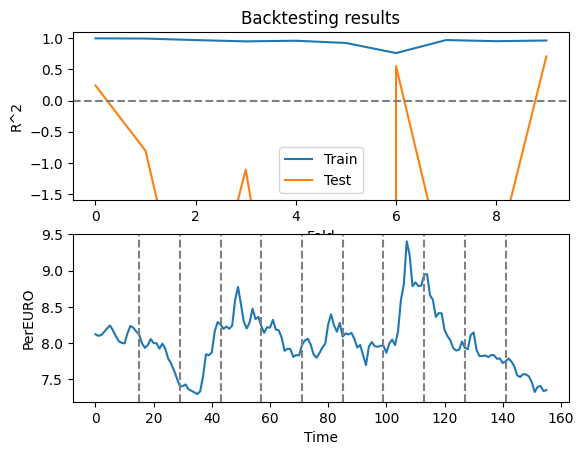

In [21]:
# Plot the backtesting results for train and test data, and under it ad the original data (PerEURO) as a subplot
plt.subplot(2,1,1)
plt.plot(scores['train_score'], label='Train')
plt.plot(scores['test_score'], label='Test')
plt.xlabel('Fold')
plt.ylabel('R^2')
plt.title('Backtesting results')
plt.axhline(0, color='gray', linestyle='--')
plt.ylim(-1.6,1.1)
plt.legend()
plt.subplot(2,1,2)
plt.plot(OilExchange_train.loc[:, 'PerEURO'])
for i in range(10):
    plt.axvline(x=max_train[i], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('PerEURO')
plt.show()

## Resources
- [Roy Yang's bloggpost on uber.com](https://www.uber.com/en-NO/blog/omphalos/)
- Raju Rimal's dataset on [ResearchGate](https://www.researchgate.net/publication/275647285_Related_Dataset),
- ... and his [Master thesis](https://nmbu.brage.unit.no/nmbu-xmlui/handle/11250/283547).
- [scikit-learn's TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html)
- [scikit-learn's Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [scikit-learn's cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
- [scikit-learn's cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
